# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

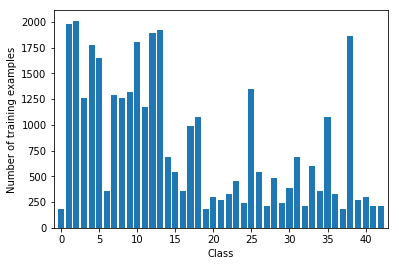

In [1]:
# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import random
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples

n_train = len(X_train)

n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of Validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of Validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2


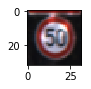

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

#image = X_train_norm[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
from sklearn.utils import shuffle
import cv2
from skimage import exposure

# Calculate mean image and substract it from the all the training image
def average_img(image_set):
    # Alternative method using numpy mean function
    images = np.array([image_set[index].squeeze() for index in range(len(image_set))])
    print (images.shape)
    mean_img = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    
    image_norm = np.zeros_like(image_set)

    for index in range(n_train):
        image = X_train[index].squeeze()
        image_norm[index, :, : ,:] = image - mean_img
    
    return mean_img, image_norm

# convert RGB to grayscale.
def RGBtoGRAY(image_set):
    X_gray = np.zeros(shape=(len(image_set),32,32,1), dtype=image_set.dtype)
    for index in range(len(image_set)):
        image = image_set[index].squeeze()
        X_gray[index, :, : ,0] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return X_gray

# normalize the image to value between 0 and 1
def normalize(X):
    X = (X / 255.).astype(np.float32)
    return X

# Apply localized histogram localization  
def histogram(image_set):
    X_histo = np.zeros(shape=(len(image_set),32,32,1), dtype=image_set.dtype)
    for index in range(len(image_set)):
        image = image_set[index].squeeze()
        X_histo[index, :, : ,0] = exposure.equalize_adapthist(image)
    return X_histo
 
def preprocess_image(image_set):
    gray = RGBtoGRAY(image_set)
    norm = normalize(gray)
    histo = histogram(norm)
    return histo

X_train = preprocess_image(X_train)
X_valid = preprocess_image(X_valid)
X_test  = preprocess_image(X_test)

# visualize image after preprocessing.
img = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(img, cmap="gray")

# shuffle the data around.
X_train, y_train = shuffle(X_train, y_train)

/home/arpitb/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [ ]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

### Model Architecture

In [ ]:
# LeNet Architecture
from tensorflow.contrib.layers import flatten

# Network Parameters
mu = 0
sigma = 0.1

# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bd1': tf.Variable(tf.zeros(120)),
    'bd2': tf.Variable(tf.zeros(84)),
    'out': tf.Variable(tf.zeros(n_classes))}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
    
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')
    
def LeNet(x):    
      
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    
    conv_out = conv2
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # Output Layer - class prediction - 1024 to 10
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits, conv_out

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
### Visualize your network's feature maps here.

# sess : Tensorflow Session
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):

    fig = pyplot.figure(figsize=(5, 5))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.5)
    
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    
    for featuremap in range(featuremaps):
        ax = fig.add_subplot(5, 5, featuremap + 1, xticks=[], yticks=[])
        #plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        ax.set_title('FeatMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            ax.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            ax.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            ax.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            ax.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    pyplot.show()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
# Defining Learning Rate
rate = 0.001

# Create Neural Network
logits, conv2 = LeNet(x)

# Define cost function as cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Define loss
loss_operation = tf.reduce_mean(cross_entropy)

# Select Optimizer [Adam in our case]
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# Define Backprop operation
training_operation = optimizer.minimize(loss_operation)

# Define Prediction operation for trained model
prediction = tf.cast(tf.nn.softmax(tf.cast(logits, tf.float64)), tf.float32)

In [ ]:
# Define Accuracy formula
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaluation function for Validation and test data
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Start training the model
num_examples = len(X_train)
max_acc = 0.0

print("Training...")
print()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print ("batch shape ",  batch_x.shape)
            #print ("X train shape ", X_train.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        outputFeatureMap(sess, batch_x, conv2)
        
        if (max_acc < validation_accuracy):
            max_acc = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")

In [ ]:
# Test the trained model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
import glob
from skimage import io
import os

X_custom = np.zeros(shape=(0,32,32,3), dtype=X_train.dtype)

test_images = glob.glob("test/*.png")
test_images.sort()

for image in test_images:
    img = io.imread(image)
    X_custom = np.append(X_custom, [img[:, :, :3]], axis = 0)

y_custom = np.array([
    21, # "example_00001"
    39, # "example_00002"
    17, # "example_00003"
    17, # "example_00004"
    17, # "example_00005"
    39, # "example_00006"
    39, # "example_00007"
    40, # "example_00008"
    40, # "example_00009"
    34, # "example_00010"
    28, # "example_00011"
    39, # "example_00012"
    0, # "example_00013"
    17, # "example_00014"
    38, # "example_00015"
    13, # "example_00016"
    40, # "example_00017"
    13, # "example_00018"
    38, # "example_00019"
    38, # "example_00020"
    11, # "example_00021"
    0, # "example_00022"
    28, # "example_00023"
    0, # "example_00024"
    32, # "example_00028"
    40, # "example_00029"
    28, # "example_00030"
    40, # "example_00031"
    40, # "example_00032"
    28, # "example_00033"
    24, # "example_00034"
    0, # "example_00035"
    0 # "example_00036"
])
X_custom = preprocess_image(X_custom)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(X_custom)):
    # visualize image after preprocessing.
    img = X_custom[i].squeeze()
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(img, cmap='gray')
pyplot.show()

### Predict the Sign Type for Each Image

In [ ]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]

sign_class = dict()
for index, sign in enumerate(signnames):
    sign_class[index] = sign

### Analyze Performance

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_custom, y_custom)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

X_cust = np.zeros(shape=(1,32,32,1), dtype=X_train.dtype)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for n in range(len(test_images)):
        X_cust[0] = X_custom[n]
        y_cust = np.array([y_custom[n]])

        img = X_cust[0].squeeze()
        fig = pyplot.figure(figsize=(15, 15))
        ax = fig.add_subplot(10, 10, 1, xticks=[], yticks=[])
        ax.imshow(img, cmap='gray')
        pyplot.show()
        
        output = sess.run(prediction, feed_dict={x: X_cust})
        # Define Top 3 prediction
        top3 = tf.nn.top_k(tf.constant(output), k=3)
        topk = sess.run(top3)
        
        print ("Actual :", sign_class[y_cust[0]])
        print ()
        print ("==== predicted Top 3 Values ====")
        print ()
        print ("sign: ", sign_class[topk.indices[0][0]], " -- with prob: ", topk.values[0][0])
        print ("sign: ", sign_class[topk.indices[0][1]], " -- with prob: ", topk.values[0][1])
        print ("sign: ", sign_class[topk.indices[0][2]], " -- with prob: ", topk.values[0][2])
